[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/11yHnrnqt6OvwJ1TWclhAIEz7grrAu3pN?usp=sharing)


 # Teoria

O que é Random Forest??

 - Várias árvores, uma floresta – Treina-se muitas árvores de decisão independentes (tipicamente dezenas ou centenas).



 Em uma Random Forest não existe “a árvore escolhida”: todas as árvores que compõem o ensemble fazem uma previsão e o resultado final é dado pela votação majoritária (no caso de classificação) ou pela média das previsões (no caso de regressão).



# Prática

## Dataset Vinhos

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [21]:

import numpy as np
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Carregar dados (Wine Dataset: 3 classes, 13 atributos)
X,y  = load_wine(return_X_y=True, as_frame=True)




In [22]:
X.shape, y.shape

((178, 13), (178,))

In [26]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [24]:
y.value_counts()

,count
target,
1,71
0,59
2,48


In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [27]:
# treino!!
rf = RandomForestClassifier(
    n_estimators=200,      # número de árvores
    max_depth=None,        # sem limite → deixa a árvore crescer até precisar parar
    max_features="sqrt",   # raiz quadrada do nº de atributos em cada split
    # Cada nó pode ver um subconjunto diferente de colunas.
    random_state=42,
)
rf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200, random_state=42)

In [33]:
y_test.value_counts()

,count
target,
1,18
0,15
2,12


In [34]:
i = 20
sample = X_test.iloc[[i]]
sample

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
143,13.62,4.95,2.35,20.0,92.0,2.0,0.8,0.47,1.02,4.4,0.91,2.05,550.0


In [36]:
y_real = y_test.iloc[i]
y_real

np.int64(2)

In [37]:
pred = rf.predict(sample)[0]
pred

np.int64(2)

In [39]:
print(f"Amostra posição {i}: verdadeiro = {y_real}; previsto = {pred}")

Amostra posição 20: verdadeiro = 2; previsto = 2


In [47]:
import numpy as np

i = 20


sample_df = X_test.iloc[[i]]
pred = rf.predict(sample_df)[0]
probs = rf.predict_proba(sample_df)[0]


print(f"Amostra {i}: predito = {pred}\n")
print("Votos por classe:")
for cls, prob in zip(rf.classes_, probs):
    votos = int(np.round(prob * rf.n_estimators))
    print(f"  • Classe {cls}: {votos} votos ({prob:.2%})")


Amostra 20: predito = 2

Votos por classe:
  • Classe 0: 6 votos (3.00%)
  • Classe 1: 40 votos (20.00%)
  • Classe 2: 154 votos (77.00%)


In [48]:
#resultados gerais
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.3f}")





Acurácia: 1.000


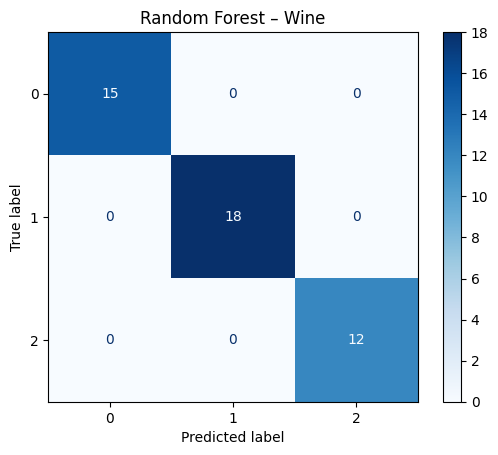

In [49]:
# 5. Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Random Forest – Wine")
plt.show()


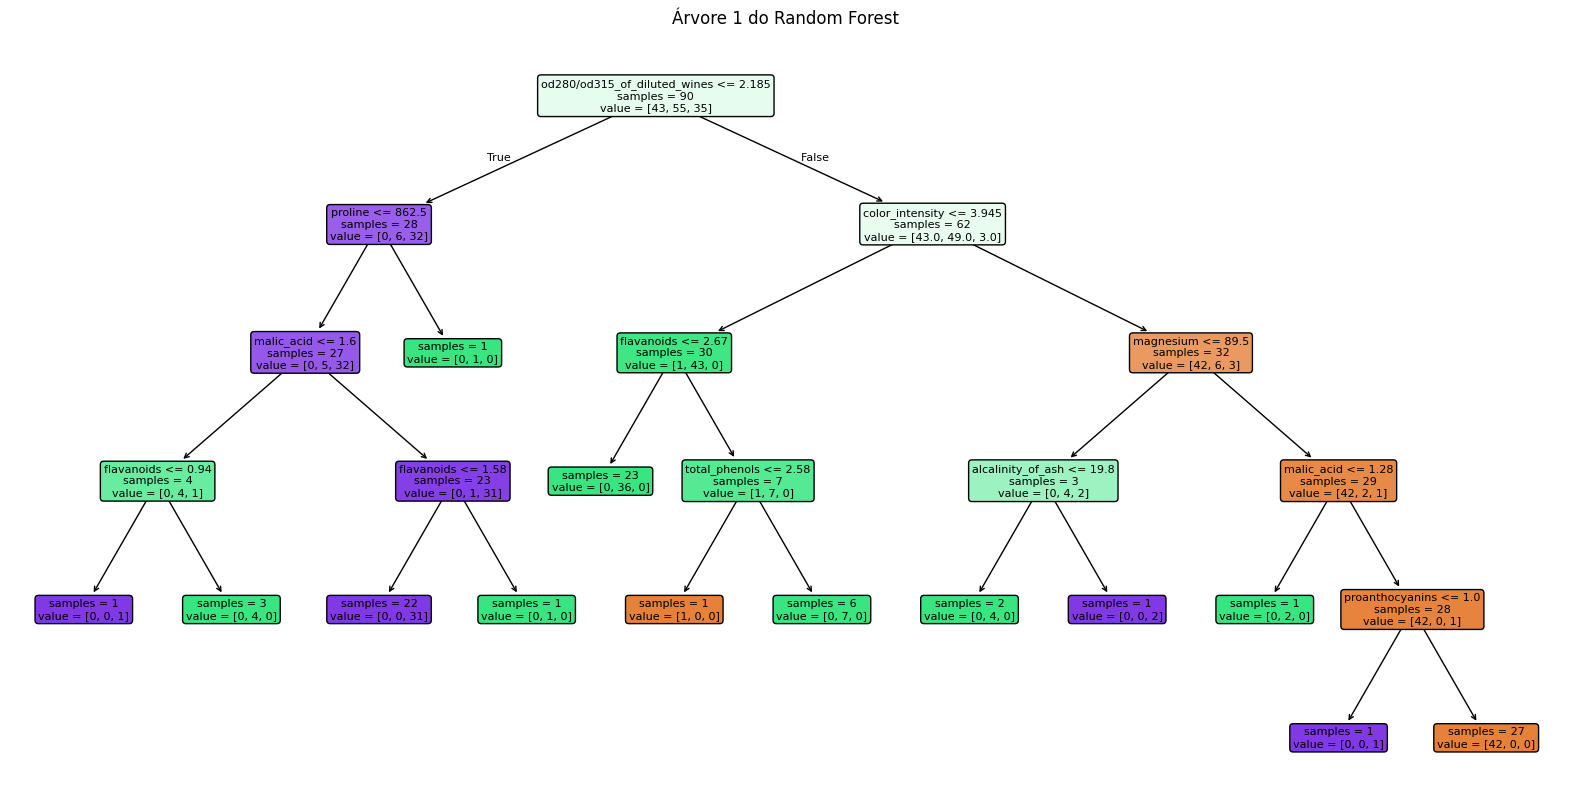

In [50]:
from sklearn.tree import plot_tree


arvore = rf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(
    arvore,
    feature_names=X.columns,
    class_names=[str(c) for c in rf.classes_],  # ['0','1','2']
    filled=True,
    rounded=True,
    impurity=False,
    fontsize=8
)
plt.title("Árvore 1 do Random Forest")
plt.show()


## Dataset digitos

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

digits = load_digits()
X, y = digits.data, digits.target

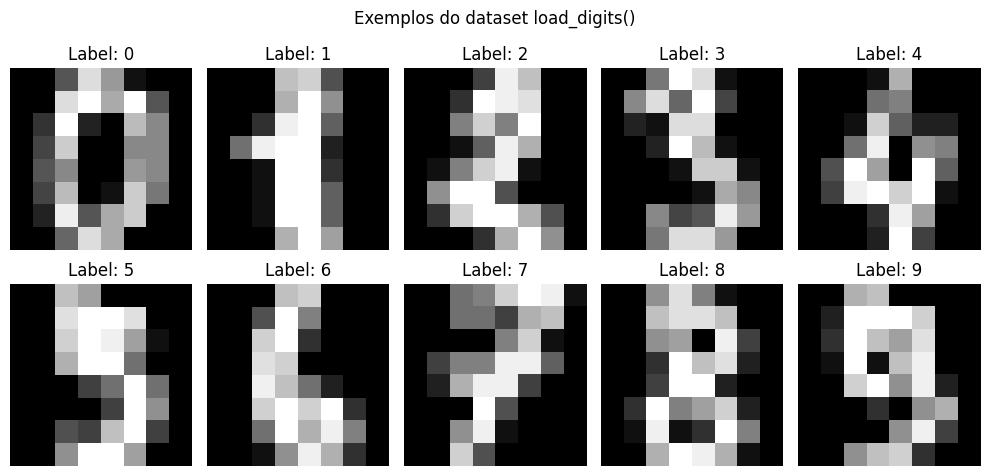

In [53]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label in zip(axes.flatten(), digits.images, digits.target):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("Exemplos do dataset load_digits()")
plt.tight_layout()
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

In [68]:
rf = RandomForestClassifier(
    n_estimators=200,
    #max_features="sqrt",

    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [69]:
y_pred = rf.predict(X_test)
print(f"Acurácia no teste: {accuracy_score(y_test, y_pred):.3f}")

Acurácia no teste: 0.967


In [57]:
idx = 20

sample_image = X_test[idx].reshape(8, 8)
true_label   = y_test[idx]
pred_label   = rf.predict([X_test[idx]])[0]

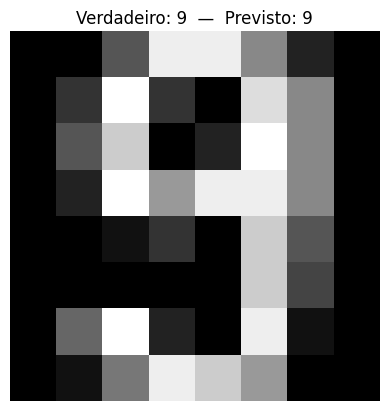

In [67]:
plt.figure()
plt.imshow(sample_image, cmap='gray')
plt.title(f"Verdadeiro: {true_label}  —  Previsto: {pred_label}")
plt.axis('off')
plt.show()